<a href="https://colab.research.google.com/github/AbelKristanto/machine-learning/blob/main/class_10_student_exam_perf_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this part, we will learn how student exam performance using SVM Kernels.


## EDA Step

In [17]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [7]:
df = pd.read_csv('StudentsPerformance.csv')
print('Information columns: {0} \n'.format(df.info()))
print('Information of shape: {0}'.format(df.shape))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
Information columns: None 

Information of shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print("Describe of dataset: \n{0}".format(df.describe()))

Describe of dataset: 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [10]:
print("Missing values is: \n{0}".format(df.isnull().sum()))

Missing values is: 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [12]:
# RENAME columns
df.columns = ['gender', 'race', 'parent_edu', 'lunch_type',
              'test_completed', 'math_score', 'reading_score',
              'writing_score']
df.head()

,gender,race,parent_edu,lunch_type,test_completed,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# VISUALIZE
fig = px.histogram(df, x='race')
fig.update_xaxes(categoryorder="category ascending")
fig.show()

<p>Based on above, we know the dataset has <b>normal graph</b>. Majority in group C of race.</p>

In [22]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['math_score'], name='Math Score'))
fig.add_trace(go.Histogram(x=df['reading_score'], name='Reading Score'))
fig.add_trace(go.Histogram(x=df['writing_score'], name='Writing Score'))

# Make Histogram Overlay
fig.update_layout(barmode='overlay')

# Reduce opacity to seet all histograms
fig.update_traces(opacity=0.75)
fig.show()

<p>Based on above, we know <b>distribution of writing > distribution of math</b>. It has same distribution between writing and reading.</p> 

In [23]:
fig = px.histogram(df, x='gender')
fig.show()

<p>Based on above, the data has <b>almost same</b> counting between male and female.

In [25]:
# Generate Average
df['average'] = (df['reading_score'] + df['math_score'] + df['writing_score'])/3

df['grade'] = 'na'
df.loc[(df.average >= 90) & (df.average <= 100), 'grade'] = 'A+'
df.loc[(df.average >= 80) & (df.average <= 90), 'grade'] = 'A-'
df.loc[(df.average >= 70) & (df.average <= 80), 'grade'] = 'B+'
df.loc[(df.average >= 60) & (df.average <= 70), 'grade'] = 'B-'
df.loc[(df.average >= 50) & (df.average <= 60), 'grade'] = 'C'
df.loc[(df.average >= 40) & (df.average <= 50), 'grade'] = 'D'
df.loc[(df.average >= 0) & (df.average <= 40), 'grade'] = 'F'
df.head()

,gender,race,parent_edu,lunch_type,test_completed,math_score,reading_score,writing_score,average,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,A-
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,B+


In [27]:
fig = px.histogram(df,x='grade', title='Grade Distribution')
fig.update_xaxes(categoryorder="category ascending")
fig.show()

<p>From above, we know about grade distribution that inform us about <b>B- is majority in class</b></p>.

In [32]:
fig = px.histogram(df, x='parent_edu', color='grade', title='Parents Education vs Grade Distribution')
fig.show()

<p>From above, we can concluded <b>"the higher of parents education can impact score of students"</b></p>

In [33]:
fig = px.box(df, y='race', color='grade', title='Race vs Grade Distribution')
fig.show()

<p>From Above, <b>Race Group A</b> has good grade than another</p>

In [39]:
fig = px.histogram(df, y='gender', color='grade', title='Gender vs Grade DIstribution')
fig.update_yaxes(categoryorder='category ascending')
fig.show()

<p>From above, women <b>is better</b> than men</p>

In [41]:
fig = px.scatter(df, x='reading_score',y='writing_score',
                 color='grade', size='math_score', 
                 hover_data=['parent_edu'],
                 title='Bubble Chart')
fig.show()

In [42]:
fig = px.scatter_3d(df, x='math_score', y='reading_score',
                    z='writing_score', color='race',
                    title='Distribution Learning Score with Race')
fig.show()

In [43]:
fig = px.scatter_3d(df, x='math_score', y='reading_score',
                    z='writing_score', color='grade', size_max=18,
                    symbol='lunch_type', opacity=0.8)
fig.show()

In [44]:
df.head()

,gender,race,parent_edu,lunch_type,test_completed,math_score,reading_score,writing_score,average,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,A-
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,B+


## Build Correlation

In [49]:
# TRANSFORM data with labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['parent_edu'] = le.fit_transform(df['parent_edu'])
df['test_completed'] = le.fit_transform(df['test_completed'])
df['lunch_type'] = le.fit_transform(df['lunch_type'])
df.head()

,gender,race,parent_edu,lunch_type,test_completed,math_score,reading_score,writing_score,average,grade
0,0,1,1,1,1,72,72,74,72.666667,B+
1,0,2,4,1,0,69,90,88,82.333333,A-
2,0,1,3,1,1,90,95,93,92.666667,A+
3,1,0,0,0,1,47,57,44,49.333333,D
4,1,2,4,1,1,76,78,75,76.333333,B+


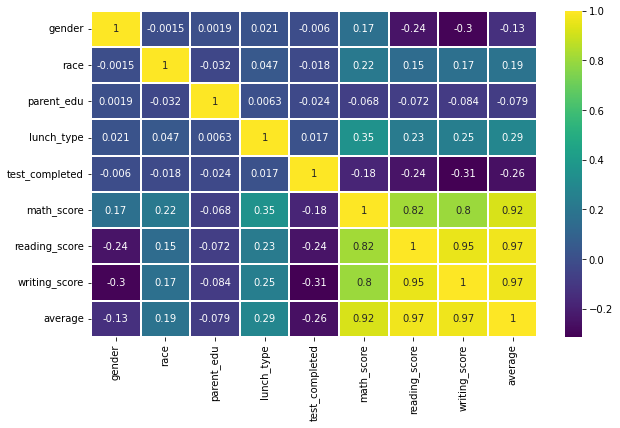

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidth=1)

## MADE A Modelling

In [51]:
# PREDICT Math Score
X = df[['gender', 'race', 'parent_edu', 'lunch_type', 
        'test_completed', 'writing_score','reading_score']].values
y = df['math_score'].values
y = y.reshape(len(y),1)

In [68]:
# Train TEST split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
# Scaling Feature of dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [70]:
# Model
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(kernel='linear')

In [76]:
# PREDICTION step
y_pred = sc_y.inverse_transform(model.predict(sc_X.transform(X_test)).reshape(-1, 1))
np.set_printoptions(precision=2)
data = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1)

In [79]:
# Accuracy
from sklearn.metrics import r2_score
print("Score accuracy of R2 Score: {0}".format(r2_score(y_test, y_pred)))

Score accuracy of R2 Score: 0.8795610281967219


In [81]:
dataset = pd.DataFrame({'y_test':data[:,0], 'y_pred':data[:,1]})
dataset.head()

,y_test,y_pred
0,77.198399,91.0
1,56.913774,53.0
2,79.271836,80.0
3,77.077821,74.0
4,85.081630,84.0


In [83]:
# Visualize
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataset.index, y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset.index, y=dataset['y_pred'], name='Predicted Value',
                         line=dict(color='firebrick', width=2)))

In [ ]:
# FINISH